In [1]:
!pip install azure-cognitiveservices-vision-customvision

     |████████████████████████████████| 62 kB 343 kB/s 
     |████████████████████████████████| 85 kB 3.5 MB/s 
     |████████████████████████████████| 41 kB 476 kB/s 


In [2]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import os, time, uuid

In [9]:
# Authenticate Colab to use my Google Drive for data storage and retrieval
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Parkinson-s-Disease-Classifier'

Mounted at /content/gdrive


In [12]:
base_dir 

'/content/gdrive/My Drive/Parkinson-s-Disease-Classifier'

In [14]:
# Replace with valid values
ENDPOINT = "enter endpoint"
prediction_key = "enter key"
project_id = "enter id"
publish_iteration_name="parkinson"

	healthy: 91.66%
	parkinson: 8.34%


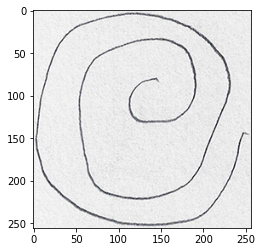

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Now there is a trained endpoint that can be used to make a prediction
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

path= base_dir+"/dataset/test/healthy"

with open(os.path.join (base_dir, "dataset/test/healthy/V01HE01.png"), "rb") as image_contents:
    image = mpimg.imread(os.path.join (base_dir, "dataset/test/healthy/V01HE01.png"))
    plt.figure()
    plt.imshow(image)
    results = predictor.classify_image(
        project_id, publish_iteration_name, image_contents.read())

    # Display the results.
    for prediction in results.predictions:
        print("\t" + prediction.tag_name +
              ": {0:.2f}%".format(prediction.probability * 100))